In [25]:
import os
import subprocess
# --------- Automatic SCP file download ----------
print("Downloading latest data from Raspberry Pi...")

# The SCP command:
scp_command = [
    "scp",
    "jaszczurpi@192.168.0.157:/home/jaszczurpi/VSCode_pi/ADC_code/adc_log.csv",
    "/home/jaszczur_fedora_wsl/VScode/Magisteka/CWT_magisterka"
]

# Execute the SCP command
try:
    subprocess.run(scp_command, check=True)
    print("Data file successfully downloaded.")
except subprocess.CalledProcessError as e:
    print("Error while downloading file:", e)

Data file successfully downloaded.


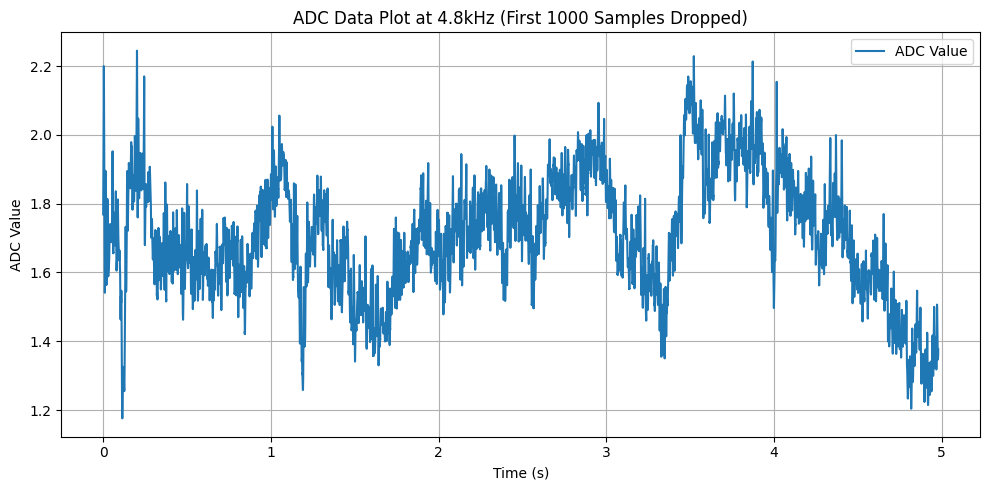

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
filename = 'adc_log.csv'
sampling_rate = 4800  # in Hz

# Load ADC values (single column)
adc_values = pd.read_csv(filename, header=None).squeeze()  # Convert to Series

# Drop first 1000 samples
adc_values = adc_values[100:].reset_index(drop=True)
time = np.arange(len(adc_values)) / sampling_rate  # Recompute time axis

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, adc_values, label='ADC Value')
plt.xlabel('Time (s)')
plt.ylabel('ADC Value')
plt.title('ADC Data Plot at 4.8kHz (First 1000 Samples Dropped)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

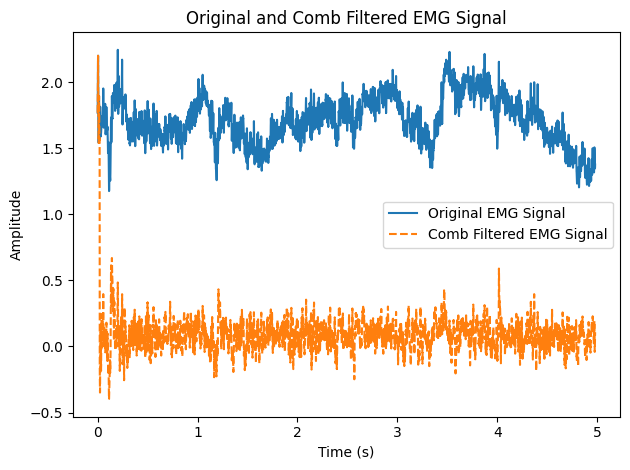

In [27]:
from scipy.signal import butter, filtfilt, iirnotch, hilbert, lfilter
import numpy as np
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import pandas as pd
import pywt

signal = adc_values
# signal = signal1
t = time
fs = sampling_rate


# Define the comb filter
def comb_filter(signal, delay, alpha):
    b = np.zeros(delay + 1)
    b[0] = 1
    b[-1] = -alpha
    a = [1]
    return lfilter(b, a, signal)

# Parameters for the comb filter
delay = int(fs / 50)  # Delay in samples (for 50 Hz)
alpha = 0.95  # Feedback coefficient

# Apply the comb filter to the signal
filtered_signal_FFC = comb_filter(signal, delay, alpha)

# Plot the original and filtered signals
fig, ax = plt.subplots()
ax.plot(t, signal, label='Original EMG Signal')
ax.plot(t, filtered_signal_FFC, label='Comb Filtered EMG Signal', linestyle='--')
ax.set_title("Original and Comb Filtered EMG Signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.legend()

plt.tight_layout()
plt.show()
